# CEE 201: Linear Programming with Jupyter Notebooks

## The Mining Company Problem with a Nonlinear Objective Function
### ReVelle et al. book, Ch. 3, Ex. 3.3 p.55

In [32]:
# Import python packages numpy, matplotlib, and pulp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pulp

### Problem Statement
Company has two mines whose ores contain both copper and nickel minerals. Company is negotiating contracts to increase copper production to 330 tons per week and nickel to 225 tons per week. This would require operating mines over the weekend and increase labor costs. The costs expect to be $\$6,000$ per weekend day for mine 1 and $\$12,000$ per weekend day for mine 2. How can we modify the 3.2 problem to incorporate the new piece of information?

Our **objective** is to set up a linear program that will show the company how to meet its contract obligations at the least total cost.

## Model Formulation
### Additional Decision Variables
$y_1$: additional weekend days per week that we operate mine 1 \
$y_2$: additional weekend days per week that we operate mine 2  \
Note that since weekend has most 2 days we need to impose constraints to the max value of $y_1$ and $y_2$.

### Objective Function & Constraints
#### Minimizing total operating cost
$minZ=3x_1+6y_1+9x_2+12y_2$ \
The following graph shows the modified objective function for the mine operation problem.

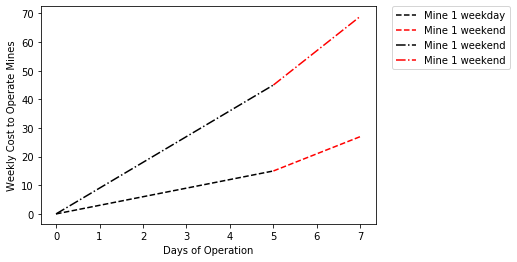

In [53]:
#Slope of cost is different for weekday days and weekend days
k1=np.linspace(0,5)
k2=np.linspace(5,7)
m1=3*k1
m2=6*k2-15
plt.plot(k1, m1, 'k--', label='Mine 1 weekday') #slope 3:1
plt.plot(k2, m2, 'r--',  label='Mine 1 weekend') #slope 6:1
n1=9*k1
n2=12*k2-15
plt.plot(k1, n1, 'k-.', label='Mine 1 weekend') #slope 9:1
plt.plot(k2, n2, 'r-.', label='Mine 1 weekend') #slope 12:1
plt.xlabel('Days of Operation')
plt.ylabel('Weekly Cost to Operate Mines')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Subject to 
* At least 330 tons of copper must be mined each week  \
$40x_1+40y_1+15x_2+15y_2\geq 330$
* At least 225 tons of nickel must be mined each week \
$14x_1+14y_1+35x_2+35y_2\geq 225$
* Mine 1 cannot operate more than 5 days per each week \
$x_1\leq 5$
* Mine 1 cannot operate more than 5 days per each week \
$x_2\leq 5$
* Mine 1 cannot operate more than 5 days per each week \
$y_1\leq 2$
* Mine 1 cannot operate more than 5 days per each week \
$y_2\leq 2$
* Hours of operation per week cannot be negative \
$x_1 \geq 0$, 
$x_2 \geq 0$, 
$y_1 \geq 0$, 
$y_2 \geq 0$

### Problem Solution
#### Solver Solution
We define the class of the problem:

In [35]:
my_lp_problem = pulp.LpProblem("My LP Problem", pulp.LpMinimize)

We set the upper and the lower bounds of $x_1$, $x_2$, $y_1$, $y_2$:

In [36]:
y1 = pulp.LpVariable('$y_1$',upBound=2, cat='Continuous')
y2 = pulp.LpVariable('$y_2$',upBound=2, cat='Continuous')
x1 = pulp.LpVariable('$x_1$',upBound=5, cat='Continuous')
x2 = pulp.LpVariable('$x_2$',upBound=5, cat='Continuous')

The objective function and constraints are added using the **+=** operator to the model.\
The objective function **Z** is added first and then we add all the constraints.

In [37]:
# Objective function
# minZ=3x1+6y1+9x2+12y2
my_lp_problem += 3 * x1 + 6 * y1+ 9 * x2 + 12 * y2, "Z"

# Constraints
my_lp_problem += 40 * x1 + 40 * y1 + 15 * x2 + 15 * y2>= 330
my_lp_problem += 14 * x1 + 14 * y1 + 35 * x2 + 35 * y2>= 225
my_lp_problem += x1>= 0
my_lp_problem += x2>= 0
my_lp_problem += y1>= 0
my_lp_problem += y2>= 0

### Solution
We inspect the mathematical program formulation.

In [38]:
my_lp_problem

My LP Problem:
MINIMIZE
3*$x_1$ + 9*$x_2$ + 6*$y_1$ + 12*$y_2$ + 0
SUBJECT TO
_C1: 40 $x_1$ + 15 $x_2$ + 40 $y_1$ + 15 $y_2$ >= 330

_C2: 14 $x_1$ + 35 $x_2$ + 14 $y_1$ + 35 $y_2$ >= 225

_C3: $x_1$ >= 0

_C4: $x_2$ >= 0

_C5: $y_1$ >= 0

_C6: $y_2$ >= 0

VARIABLES
-inf <= $x_1$ <= 5 Continuous
-inf <= $x_2$ <= 5 Continuous
-inf <= $y_1$ <= 2 Continuous
-inf <= $y_2$ <= 2 Continuous

We call the solver:

In [39]:
my_lp_problem.solve()
pulp.LpStatus[my_lp_problem.status]

'Optimal'

The optimal values of the decision variables that minimize $x_1$, $x_2$, $y_1$, and $y_2$ are:

In [40]:
#Print decision variables
print(" x1* = {}".format(x1.varValue))
print(" y1* = {}".format(y1.varValue))
print(" x2* = {}".format(x2.varValue))
print(" y2* = {}".format(y2.varValue))

 x1* = 5.0
 y1* = 1.8697479
 x2* = 3.6806723
 y2* = 0.0


Print the **objective values $Z$**:

In [41]:
#Print objective function value (max Z)
print(pulp.value(my_lp_problem.objective))

59.3445381


The minimum objective value is approximately $\$60$ thousand.